# Antoine Equation
---------------------------

The Antoine equation is 

**$$ \ln P = A - \frac {B}{C+T} $$**

where,
- **P** is the absolute vapor pressure
- **A**, **B** and **C** are the Antoine coefficients specific to the substance
- **T** is the temperature

**Remember to check the units of P and T from whatever source you use to obtain the values of A, B and C**. 

**T** could be in $^\circ C$ or $K$ and **P** could be in $kPa$ or $bar$ in general. 

At $T = T_n$ ($T_n$ is the normal boiling point), the vapor pressure ($P$) in the Antoine equation becomes the saturated vapor pressure ($P_{sat}$) i.e.,

$ \ln P_{sat} = A - \frac {B}{C+T_n} $

## Example with ethanol as the substance

In [1]:
import numpy as np

############ Antoine Coefficients for ethanol ###############
'''
Values taken from Table B.2 of Van Ness book. 
P is in kPa unit and T is in K unit.

A = 16.8958
B = 3795.17
C = -42.232
T_n = 351.35 (in Kelvin)
'''
##############################################################

def Pvap_calc(ant_coeff: tuple, T: float) -> float:
    A, B, C = ant_coeff # this unpacks the tuple
    return np.exp(A - B/(C+T))

Pvap = Pvap_calc(ant_coeff=(16.8958, 3795.17, -42.232), T=351.35)
Pvap

101.33024171210118

In [2]:
# this shows the numpy linspace function documentation directly as an output of this cell
?np.linspace 

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [3]:
T_arr = np.linspace(start=276.15, stop=369.15, num=10)

# length of T_arr will be same as the value of num argument in the np.linspace function
len(T_arr), T_arr

(10,
 array([276.15      , 286.48333333, 296.81666667, 307.15      ,
        317.48333333, 327.81666667, 338.15      , 348.48333333,
        358.81666667, 369.15      ]))

In [4]:
def Pvap_range_calc(ant_coeff: tuple, T_start: float, T_stop: float, n_pts:int = 50):
    T_arr = np.linspace(start=T_start, stop=T_stop, num=n_pts)  # len(T_arr) = n_pts
    P_arr = np.zeros(len(T_arr)) # this will create an array with all zero elements and same length as T_arr
    
    for i, T in enumerate(T_arr):
        P_arr[i] = Pvap_calc(ant_coeff, T)
    
    return T_arr, P_arr
    
T_range, Pvap_range = Pvap_range_calc(ant_coeff=(16.8958, 3795.17, -42.232), T_start=276.15, T_stop=369.15, n_pts=100)

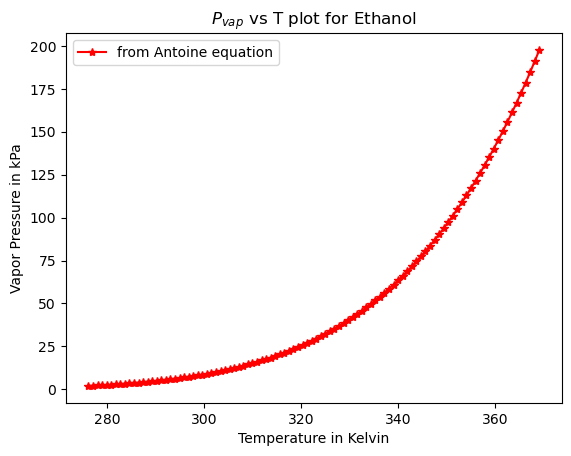

In [5]:
import matplotlib.pyplot as plt

plt.plot(T_range, Pvap_range, "r*-", label="from Antoine equation")
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Vapor Pressure in kPa")
plt.legend()
plt.title("$P_{vap}$ vs T plot for Ethanol")
plt.show()

## Classwork

Use Antoine equation and plot $P_{vap}$ vs $T$ plot for water. Vary the T in the range of 273.15 K to 473.15 K.

Antoine coefficients of water ($T$ is in K and $P_{vap}$ is in kPa)
- A = 16.3872
- B = 3885.70
- C = -42.980

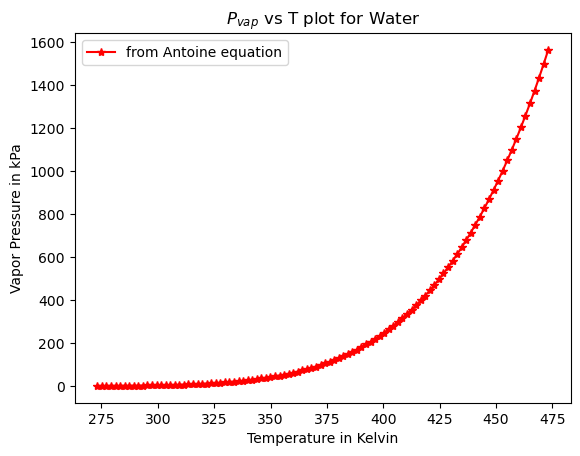

In [6]:
plt.plot(*Pvap_range_calc(ant_coeff=(16.3872, 3885.70, -42.980), T_start=273.15, T_stop=473.15, n_pts=100), "r*-", label="from Antoine equation") # * here unpacks the values
plt.xlabel("Temperature in Kelvin")
plt.ylabel("Vapor Pressure in kPa")
plt.legend()
plt.title("$P_{vap}$ vs T plot for Water")
plt.show()